In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'Green'


In [3]:
data = pd.read_csv('inputs/LoansTrainingSetV2.csv', low_memory=False)
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
data['Tax Liens'].describe()

count    111094.000000
mean          0.029354
std           0.260577
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Tax Liens, dtype: float64

In [5]:
print('Number of rows {} no. of columns {}'.format(data.shape[0], data.shape[1]))

Number of rows 111105 no. of columns 19


In [6]:
data = data.drop_duplicates(keep='first')
print('Number of rows {} no. of columns {} after dropping NULL values'.format(data.shape[0], data.shape[1]))

Number of rows 98582 no. of columns 19 after dropping NULL values


In [7]:
print('Number of unique loan is {} and unique customer is {}'.format(data['Loan ID'].nunique(), data['Customer ID'].nunique()))

Number of unique loan is 88908 and unique customer is 88908


In [8]:
## Some customer apply for more than one loan

In [9]:
data_nan = (data.isnull().sum() / len(data)) * 100
data_nan = data_nan.drop(data_nan[data_nan == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :data_nan})
missing_data.head(5)

,Missing Ratio
Months since last delinquent,53.868860
Credit Score,21.644925
Annual Income,21.644925
Years in current job,4.235053
Bankruptcies,0.213021


Text(0.5, 1.0, 'Percent missing data by feature in loan information dataset')

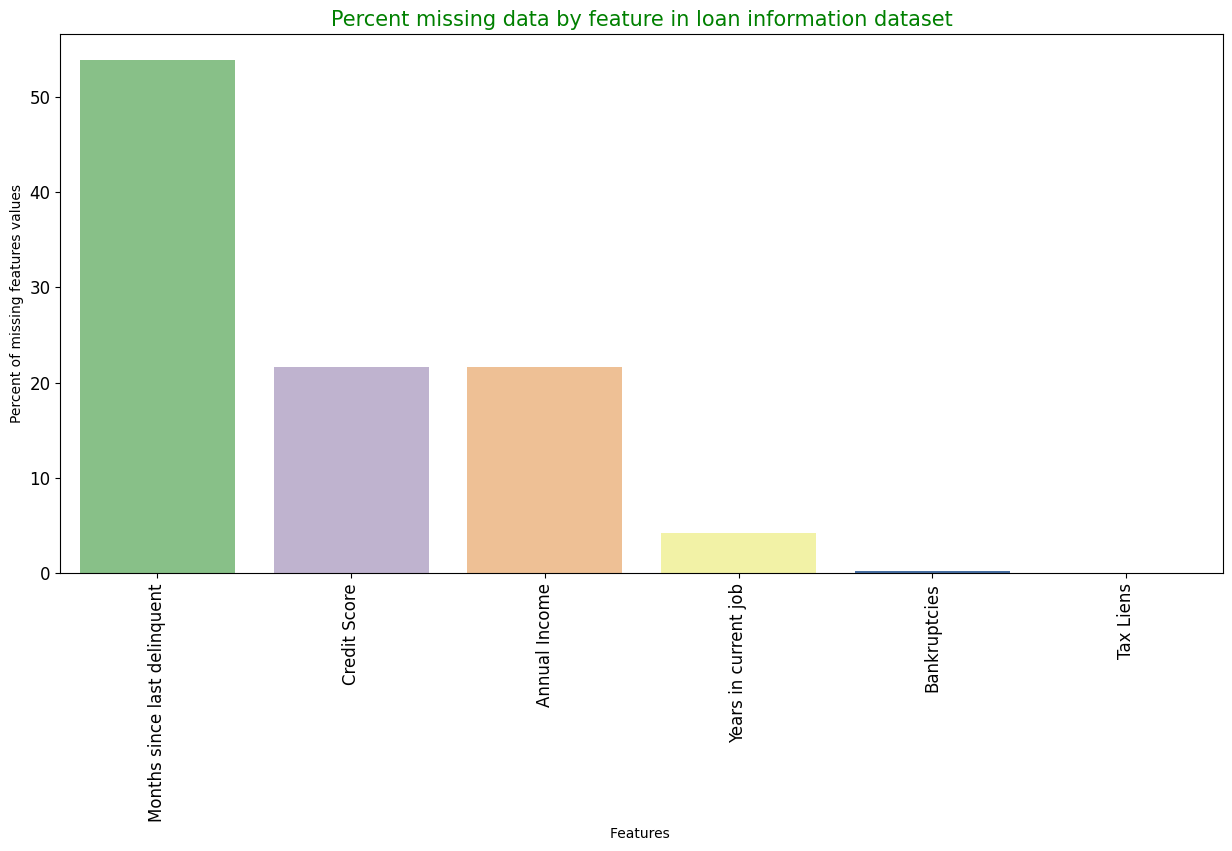

In [10]:
plt.xticks(rotation='vertical')
sns.barplot(x=data_nan.index, y=data_nan, palette=("Accent"))
plt.xlabel('Features ', fontsize=10)
plt.ylabel('Percent of missing features values', fontsize=10)
plt.title('Percent missing data by feature in loan information dataset', fontsize=15)

### Unique value in each of the features

In [38]:
from source.eda import unique_values_each_column
unique_values_each_column(data)

Loan ID : 88908
Customer ID : 88908
Loan Status : 2
Current Loan Amount : 22541
Term : 2
Credit Score : 167
Years in current job : 11
Home Ownership : 4
Annual Income : 37983
Purpose : 16
Monthly Debt : 70066
Years of Credit History : 508
Months since last delinquent : 116
Number of Open Accounts : 52
Number of Credit Problems : 14
Current Credit Balance : 33715
Maximum Open Credit : 46625
Bankruptcies : 8
Tax Liens : 13


In [11]:
def perc_on_bar(x):
    total_len = len(data[x]) # length of the column
    plt.figure(figsize=(15,7))
    ax = sns.countplot(x = data[x],palette='Paired')
    for p in ax.patches:
        per = '{:.1f}%'.format(100 * p.get_height()/total_len) 
        x = p.get_x() + p.get_width() / 2 - 0.10
        y = p.get_y() + p.get_height()          
        ax.annotate(per, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

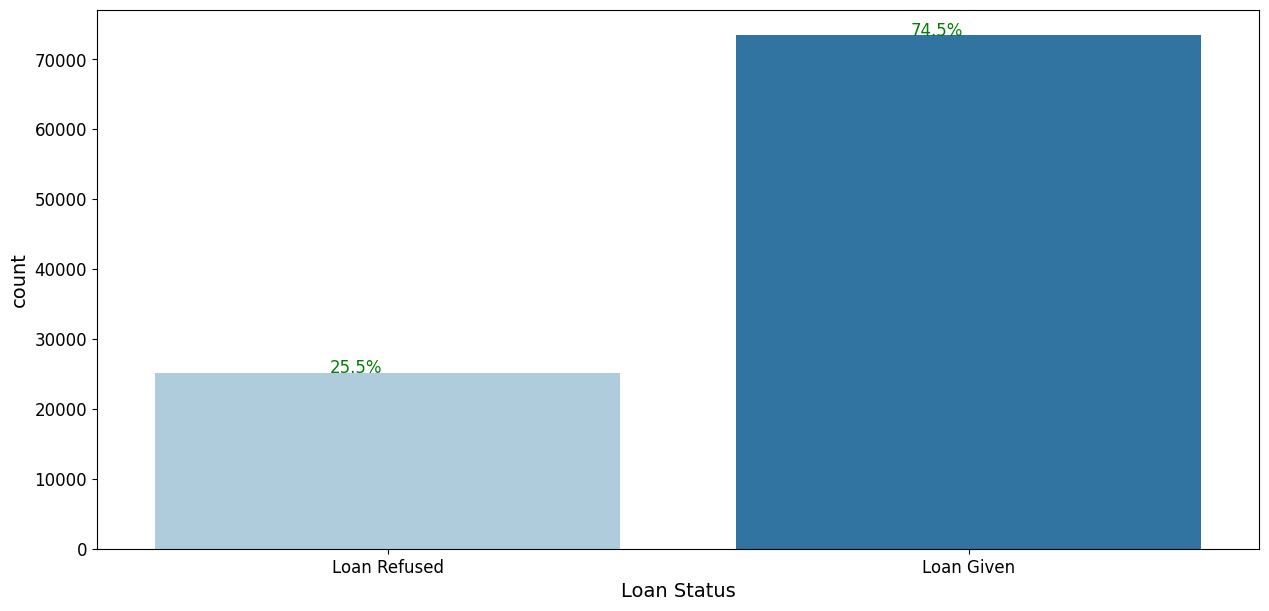

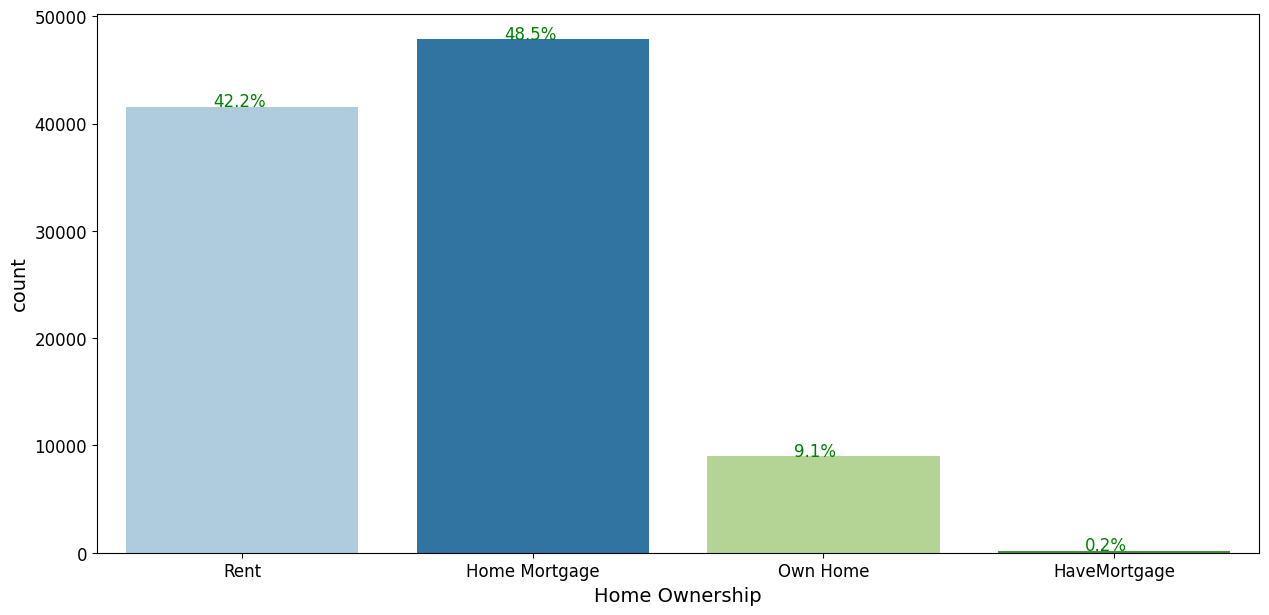

In [13]:
perc_on_bar('Home Ownership')

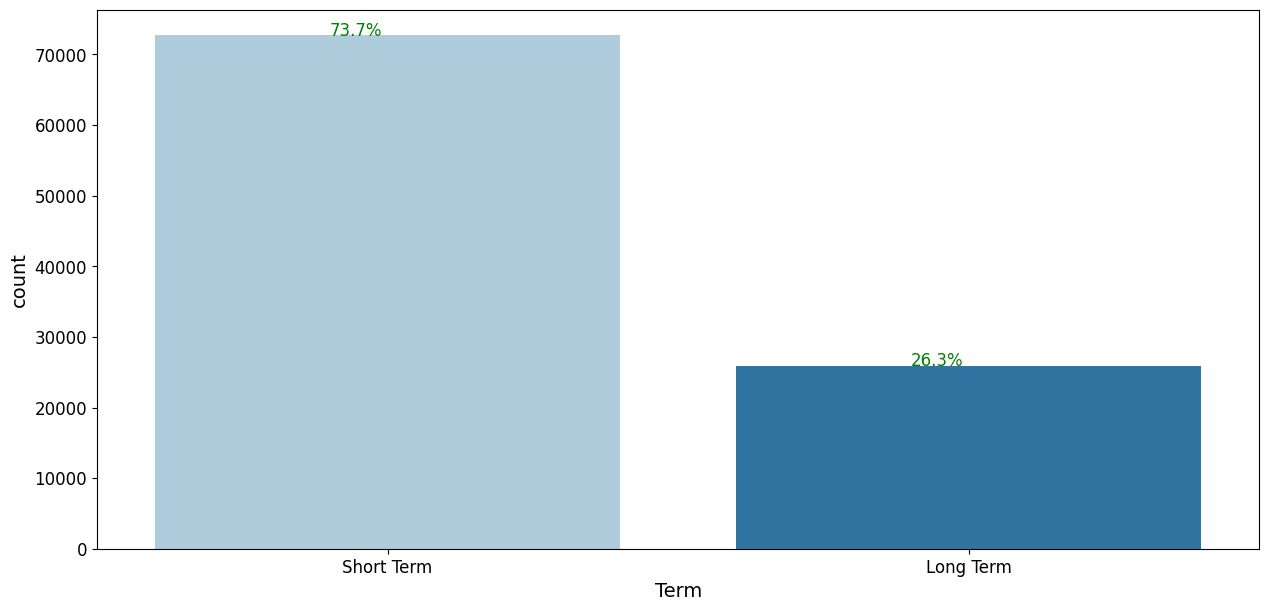

In [14]:
perc_on_bar('Term')

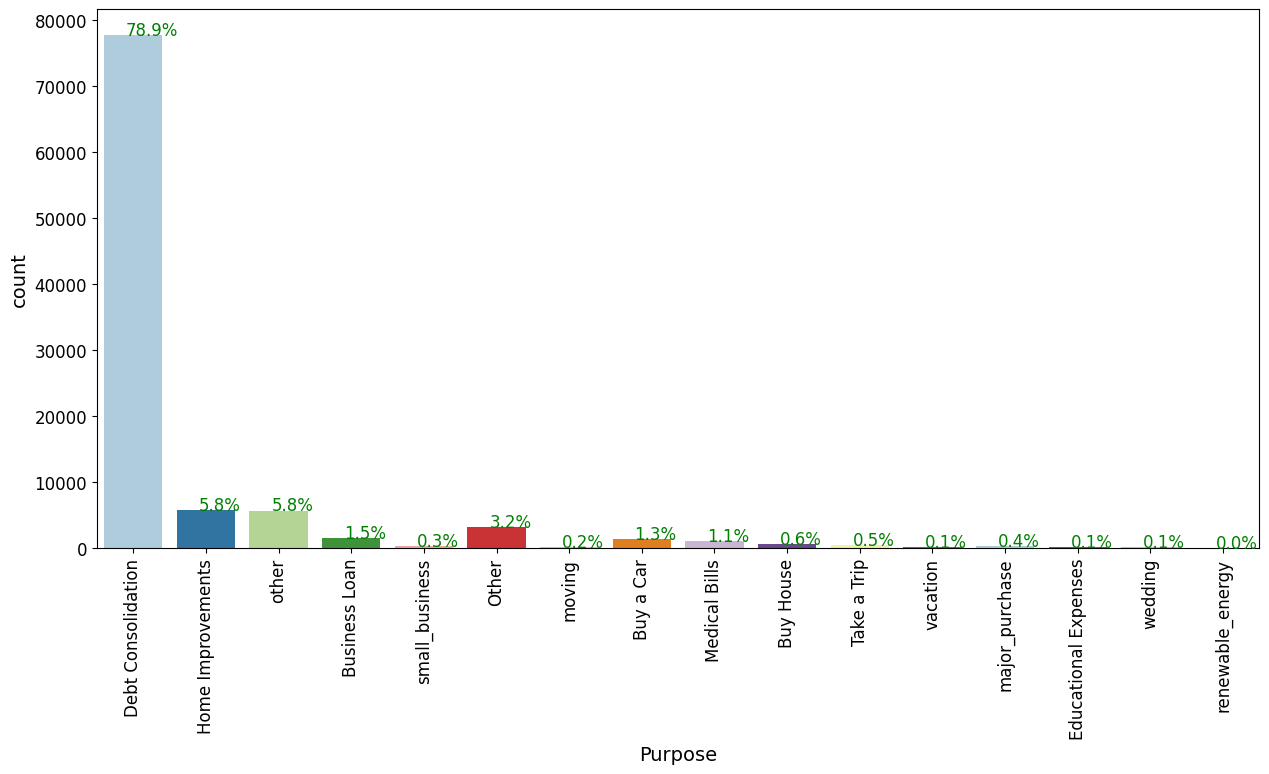

In [15]:
ax = sns.countplot(x = data['Purpose'],palette='Paired')
total_len = len(data['Purpose'])
plt.xticks(rotation=90)
for p in ax.patches:
    per = '{:.1f}%'.format(100 * p.get_height()/total_len) 
    x = p.get_x() + p.get_width() / 2 - 0.10
    y = p.get_y() + p.get_height()          
    ax.annotate(per, (x, y), size = 12) # annotate the percantage 
plt.show()

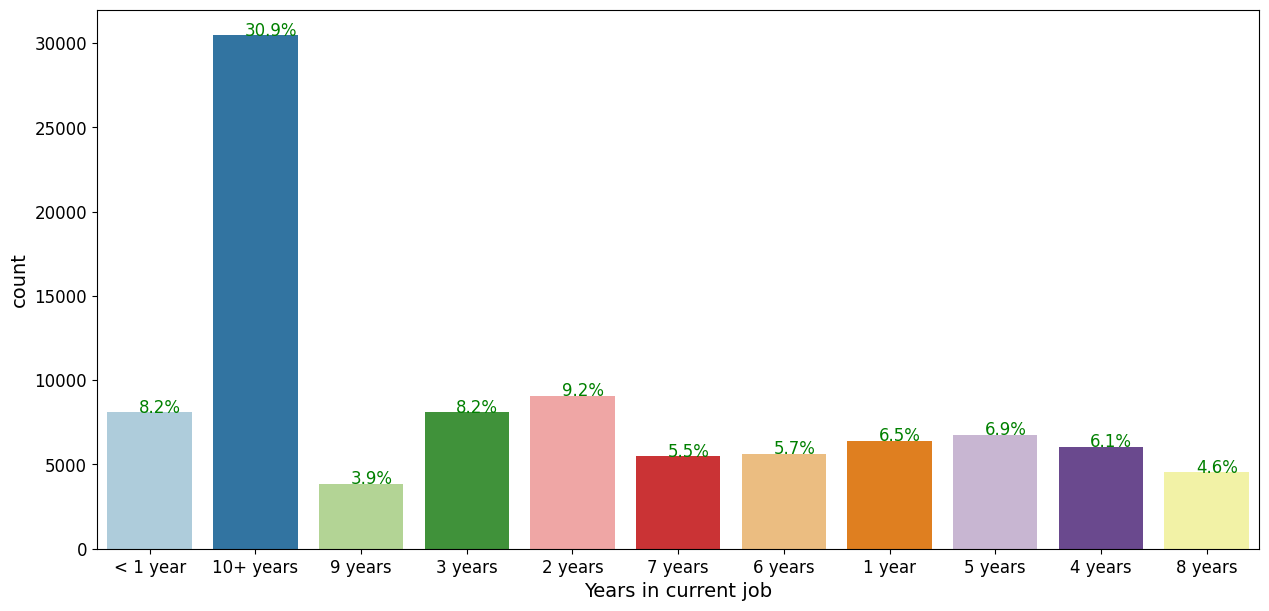

In [16]:
perc_on_bar('Years in current job')

In [17]:
years_dict = {'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, 
              '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10}
data['Years in current job'] = data['Years in current job'].map(years_dict)
### Impute with 75% quantile value
data['Years in current job'].fillna(data["Years in current job"].describe()['75%'], inplace=True)

## Credit Score

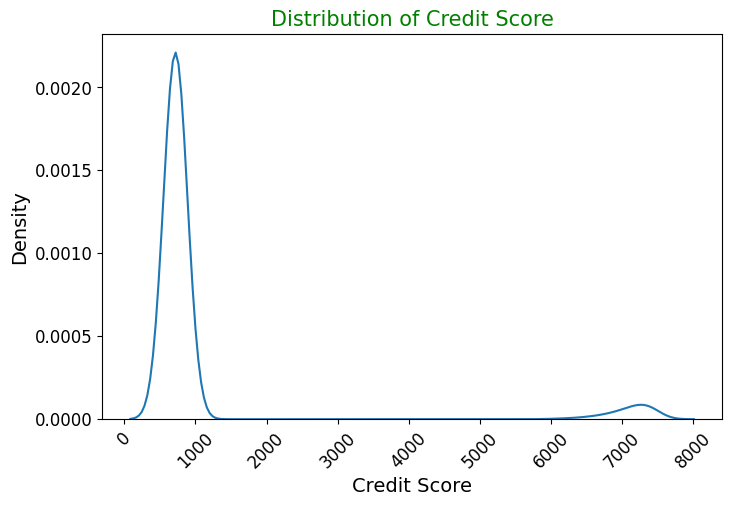

In [18]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Credit Score'])
plt.title("Distribution of Credit Score",size=15)
plt.xticks(rotation=45)
plt.show()


In [19]:
data['Credit Score'].describe() 

count    77244.000000
mean      1136.497890
std       1580.469665
min        585.000000
25%        709.000000
50%        729.000000
75%        742.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [20]:
## Credit score lies between 300 to 900
data['Credit Score'] = np.where(data['Credit Score']>900, data['Credit Score']/10, data['Credit Score'])

In [21]:
### Impute with 75% quantile value
data['Credit Score'].fillna(data["Credit Score"].describe()['75%'], inplace=True)

## Annual Income

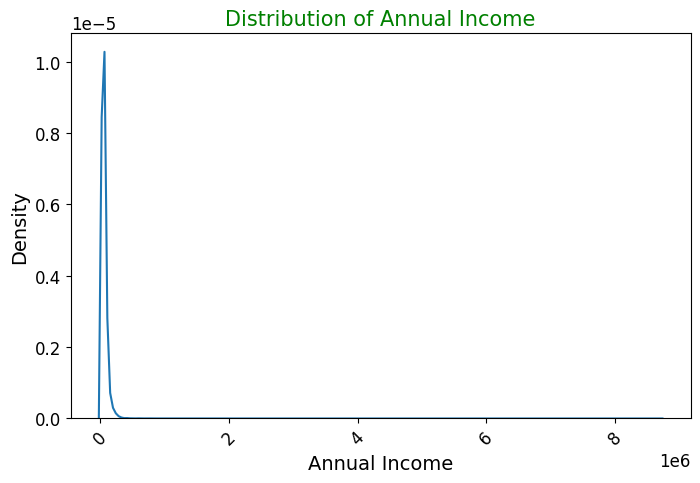

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Annual Income'])
plt.title("Distribution of Annual Income",size=15)
plt.xticks(rotation=45)
plt.show()

In [23]:
print('{} in Annual Income contains NULL value'.format(data['Annual Income'].isnull().sum()))

21338 in Annual Income contains NULL value


In [24]:
data['Annual Income'].describe()

count    7.724400e+04
mean     7.235364e+04
std      5.720191e+04
min      4.033000e+03
25%      4.462900e+04
50%      6.150000e+04
75%      8.676000e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [25]:
### Impute with 75% quantile value
data['Annual Income'].fillna(data["Annual Income"].describe()['75%'], inplace=True)

## Loan Amount

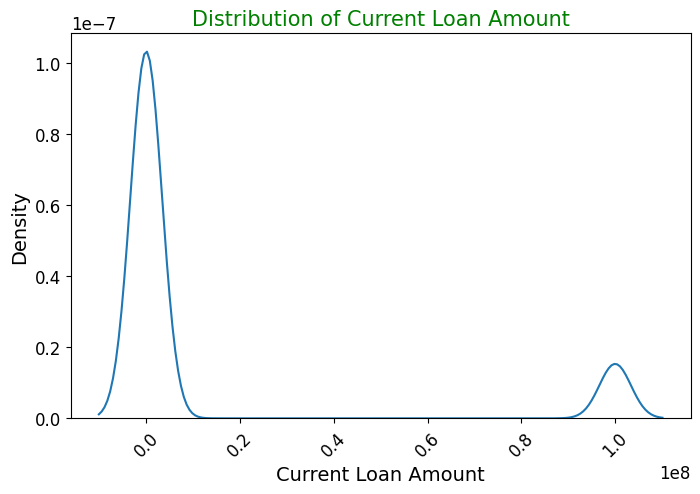

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Current Loan Amount'])
plt.title("Distribution of Current Loan Amount",size=15)
plt.xticks(rotation=45)
plt.show()


## Bankruptcies

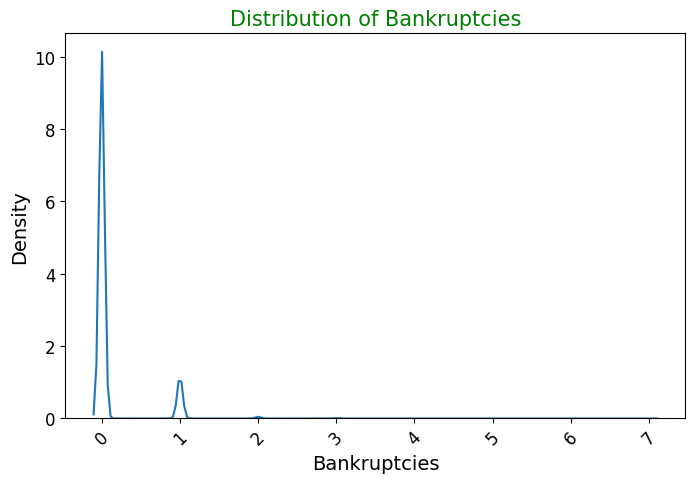

In [27]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Bankruptcies'])
plt.title("Distribution of Bankruptcies",size=15)
plt.xticks(rotation=45)
plt.show()

In [28]:
data['Bankruptcies'].describe()

count    98372.000000
mean         0.115246
std          0.347347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [29]:
print('{} in Bankruptcies contains NULL value'.format(data['Bankruptcies'].isnull().sum()))

210 in Bankruptcies contains NULL value


In [30]:
### Impute with 75% quantile value
data['Bankruptcies'].fillna(data["Bankruptcies"].describe()['75%'], inplace=True)

## Months since last delinquent

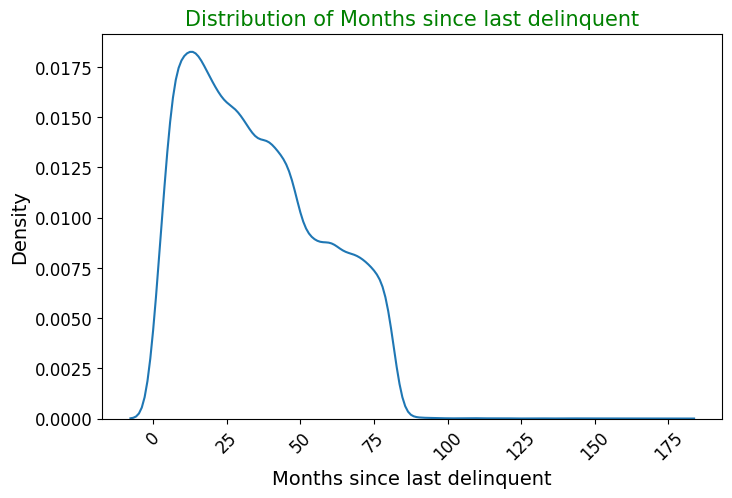

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Months since last delinquent'])
plt.title("Distribution of Months since last delinquent",size=15)
plt.xticks(rotation=45)
plt.show()


In [32]:
data['Months since last delinquent'].describe()

count    45477.000000
mean        34.980562
std         21.986223
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [33]:
### Impute with 75% quantile value
data['Months since last delinquent'].fillna(data["Months since last delinquent"].describe()['75%'], inplace=True)

## Tax Liens

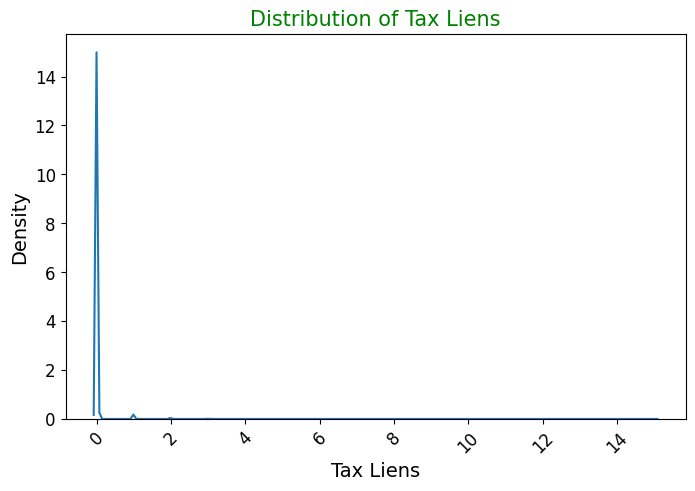

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['Tax Liens'])
plt.title("Distribution of Tax Liens",size=15)
plt.xticks(rotation=45)
plt.show()


In [35]:
data['Tax Liens'].describe()

count    98572.000000
mean         0.028943
std          0.259630
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [36]:
### Impute with 75% quantile value
data['Tax Liens'].fillna(data["Tax Liens"].describe()['75%'], inplace=True)

## Convert all the object datatype into INT/FLOAT

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98582 entries, 0 to 111104
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       98582 non-null  object 
 1   Customer ID                   98582 non-null  object 
 2   Loan Status                   98582 non-null  object 
 3   Current Loan Amount           98582 non-null  int64  
 4   Term                          98582 non-null  object 
 5   Credit Score                  98582 non-null  float64
 6   Years in current job          98582 non-null  float64
 7   Home Ownership                98582 non-null  object 
 8   Annual Income                 98582 non-null  float64
 9   Purpose                       98582 non-null  object 
 10  Monthly Debt                  98582 non-null  object 
 11  Years of Credit History       98582 non-null  float64
 12  Months since last delinquent  98582 non-null  float64
 13  Numbe

In [39]:
data.describe(include='object').T

,count,unique,top,freq
Loan ID,98582,88908,d9dbd6e3-24bb-43dd-85e4-6b0e00c29fb3,2
Customer ID,98582,88908,1d222b73-f1bd-4389-984b-4c56675cf2dd,2
Loan Status,98582,2,Loan Given,73411
Term,98582,2,Short Term,72701
Home Ownership,98582,4,Home Mortgage,47839
Purpose,98582,16,Debt Consolidation,77795
Monthly Debt,98582,70066,0,76
Maximum Open Credit,98582,46625,0,682


## Monthly Debt

In [40]:
## Values are in string, convert it into float
data['Monthly Debt'].values

array(['777.39', '892.09', '1244.02', ..., '1210.59', '1476.3', '668.71'],
      dtype=object)

In [41]:
import re
def convert_into_float(x):
    x = numbers.findall(x)
    if len(x)>0:
        return np.float32(x[0])
    else:
        return 0
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")
data['Monthly Debt'] = data['Monthly Debt'].apply(lambda x:convert_into_float(x))

## Maximum Open Credit

In [42]:
data['Maximum Open Credit'].values

array(['7946', '77961', '14815', ..., '6348', '37580', '9261'],
      dtype=object)

In [43]:
data['Maximum Open Credit'].describe()

count     98582
unique    46625
top           0
freq        682
Name: Maximum Open Credit, dtype: object

In [44]:
def convert_into_float(x):
    x = numbers.findall(x)
    if len(x)>0:
        return np.float32(x[0])
    else:
        return 0
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")
data['Maximum Open Credit'] = data['Maximum Open Credit'].apply(lambda x:convert_into_float(x))

## Loan Status

In [45]:
data['Loan Status'].value_counts()

Loan Status
Loan Given      73411
Loan Refused    25171
Name: count, dtype: int64

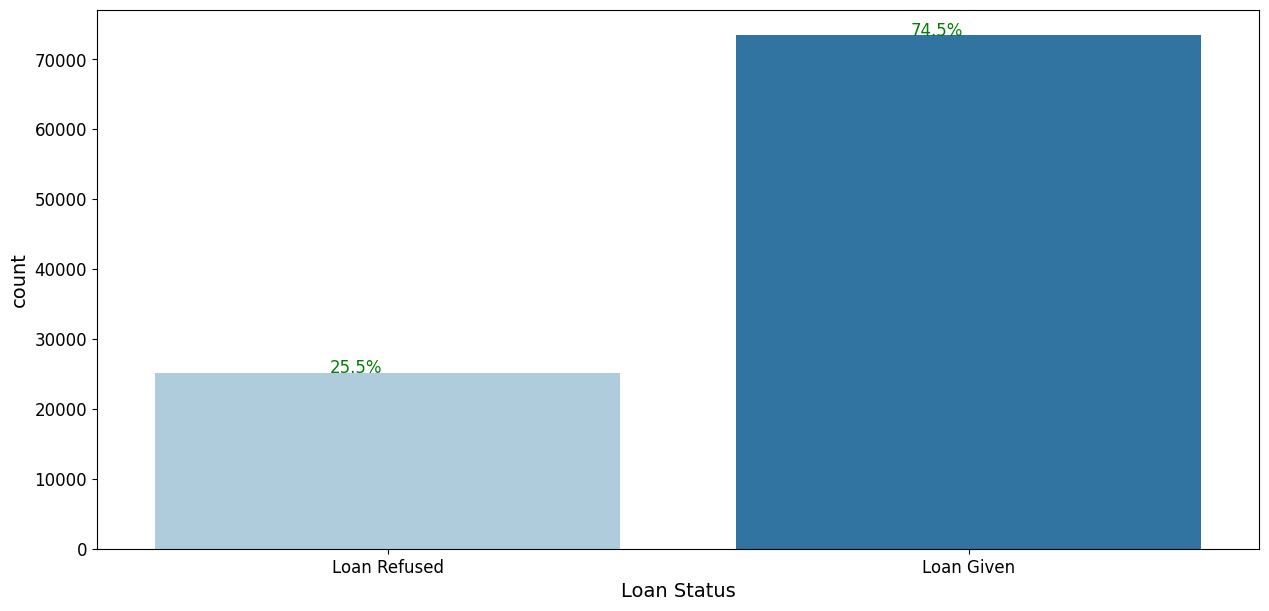

In [46]:
perc_on_bar('Loan Status')

In [47]:
status_map = {'Loan Given':1, 'Loan Refused':0}
data['Loan Status'] = data['Loan Status'].map(status_map)

## Term

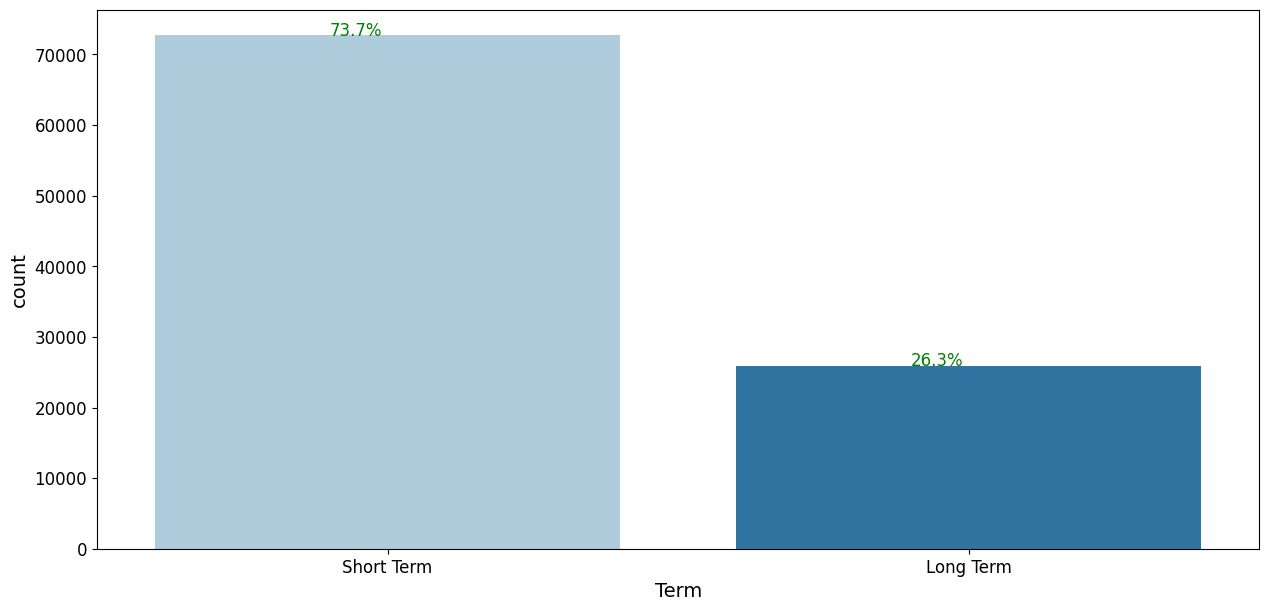

In [49]:
perc_on_bar('Term')

<Axes: xlabel='count', ylabel='Term'>

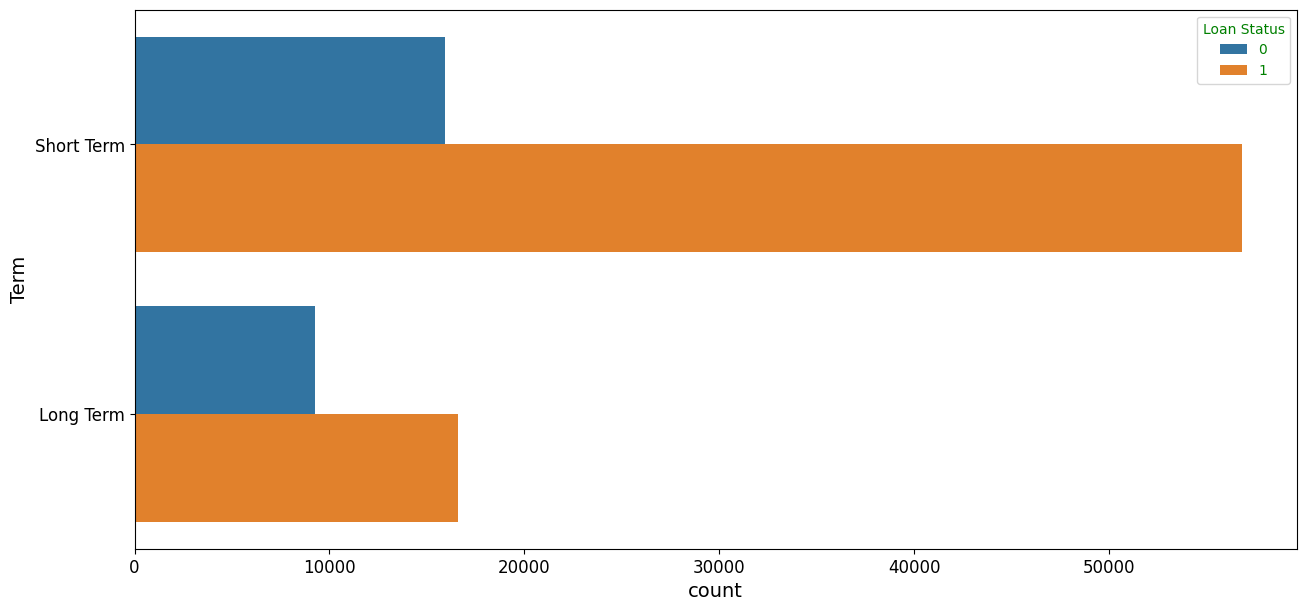

In [55]:
sns.countplot(y='Term', hue='Loan Status', data=data)

In [ ]:
## If loan is Shot Term it is approved fastly.

,Term,Loan Status
1,Short Term,0.781186
0,Long Term,0.642093


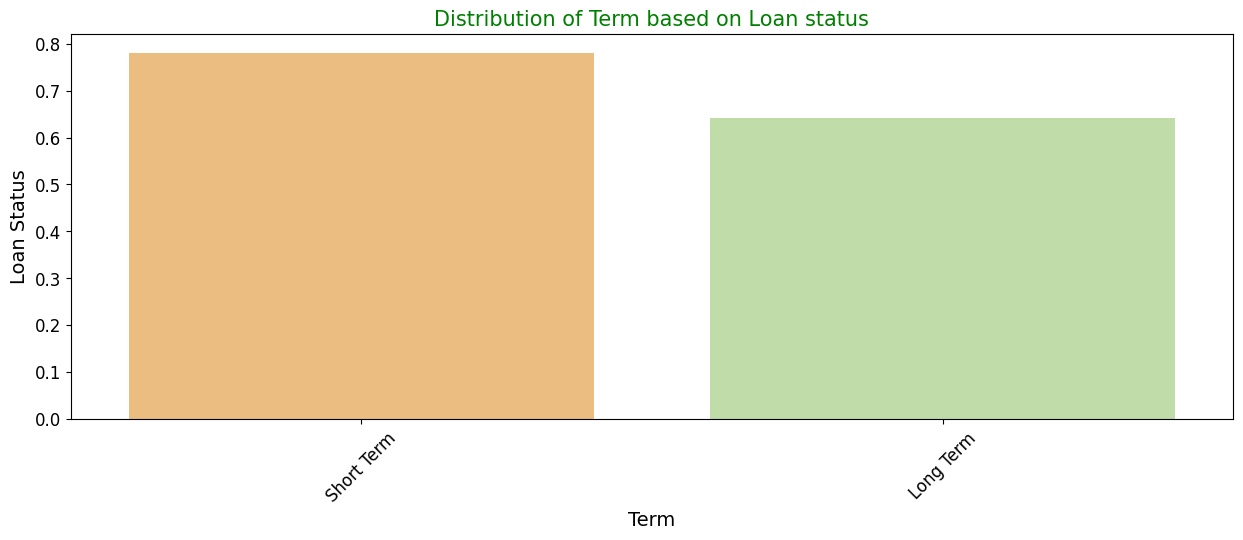

In [51]:
temp = (data.groupby('Term')['Loan Status'].mean()
            .reset_index().sort_values(by='Loan Status',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Term'],y=temp['Loan Status'], palette=("Spectral"))
plt.title("Distribution of Term based on Loan status",size=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['Loan_status_term'] =  data.groupby('Term')['Loan Status'].transform('mean')

In [56]:
 # Saving the mapping dict for inference use
loan_status_term_map = data.groupby('Term')['Loan Status'].mean().to_dict()

import pickle
fileName = 'model/loan_status_term_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(loan_status_term_map,f)

loan_status_term_map

{'Long Term': 0.6420926548433213, 'Short Term': 0.781185953425675}

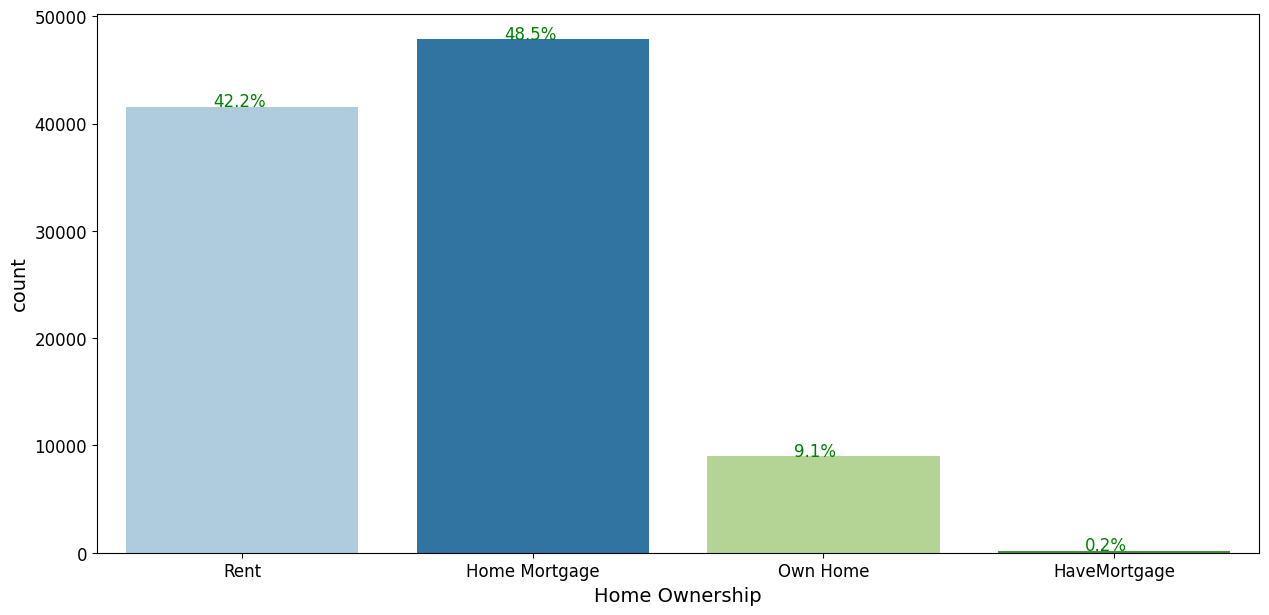

In [57]:
perc_on_bar('Home Ownership')

<Axes: xlabel='count', ylabel='Home Ownership'>

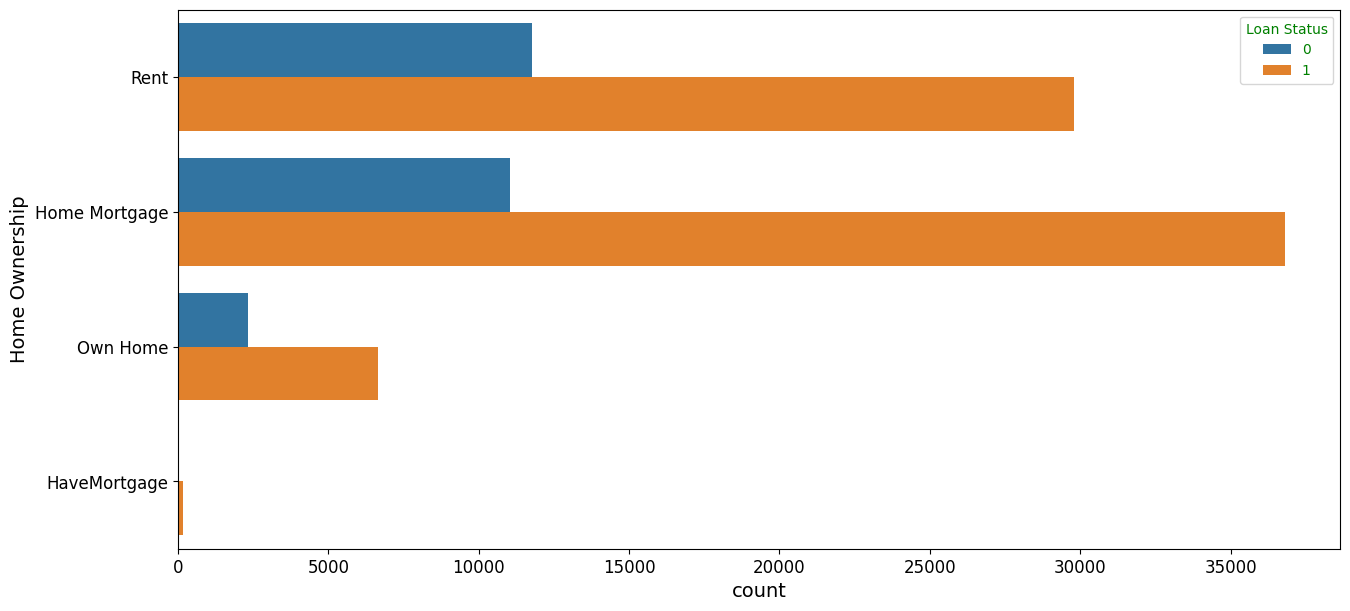

In [58]:
sns.countplot(y='Home Ownership', hue='Loan Status', data=data)

,Home Ownership,Loan Status
0,HaveMortgage,0.825641
1,Home Mortgage,0.769393
2,Own Home,0.739610
3,Rent,0.716932


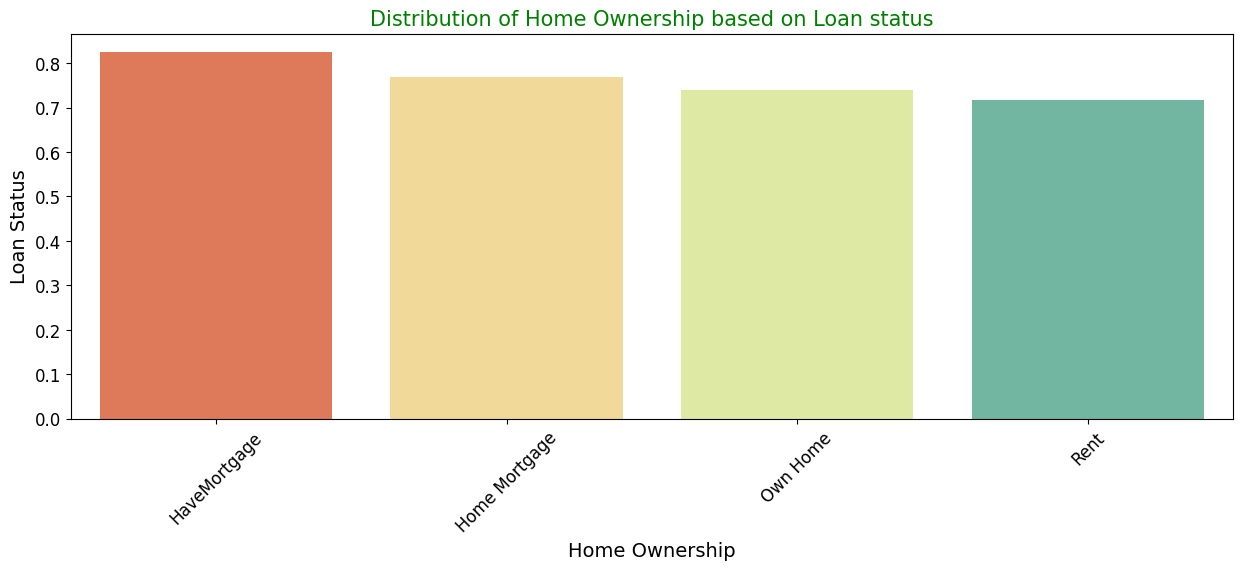

In [59]:
temp = (data.groupby('Home Ownership')['Loan Status'].mean()
            .reset_index().sort_values(by='Loan Status',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Home Ownership'],y=temp['Loan Status'], palette=("Spectral"))
plt.title("Distribution of Home Ownership based on Loan status",size=15)
plt.xticks(rotation=45)
plt.show()

In [60]:
data['Loan_status_home_ownership'] =  data.groupby('Home Ownership')['Loan Status'].transform('mean')

In [61]:
 # Saving the mapping dict for inference use
loan_status_home_ownership_map = data.groupby('Term')['Loan Status'].mean().to_dict()

import pickle
fileName = 'model/loan_status_home_ownership_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(loan_status_home_ownership_map,f)

loan_status_home_ownership_map

{'Long Term': 0.6420926548433213, 'Short Term': 0.781185953425675}

## Purpose

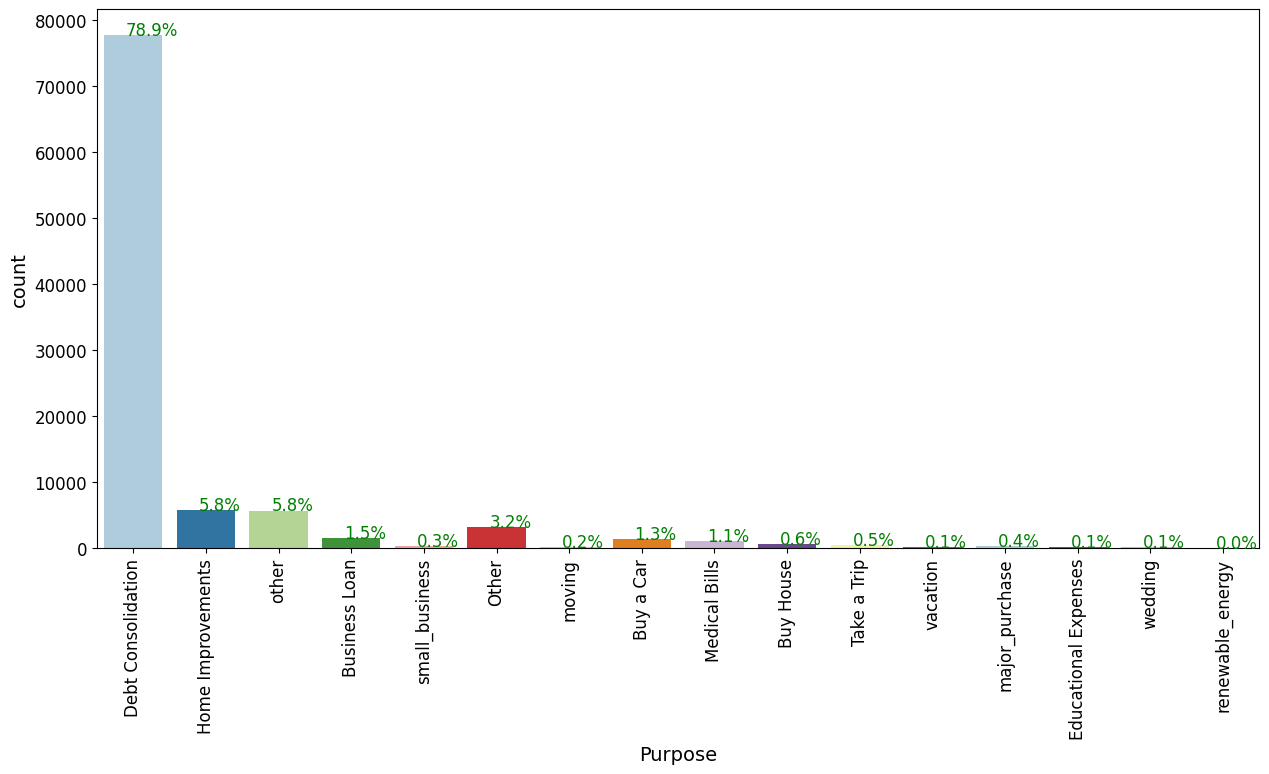

In [62]:
ax = sns.countplot(x = data['Purpose'],palette='Paired')
total_len = len(data['Purpose'])
plt.xticks(rotation=90)
for p in ax.patches:
    per = '{:.1f}%'.format(100 * p.get_height()/total_len) 
    x = p.get_x() + p.get_width() / 2 - 0.10
    y = p.get_y() + p.get_height()          
    ax.annotate(per, (x, y), size = 12) # annotate the percantage 
plt.show()

<Axes: xlabel='count', ylabel='Purpose'>

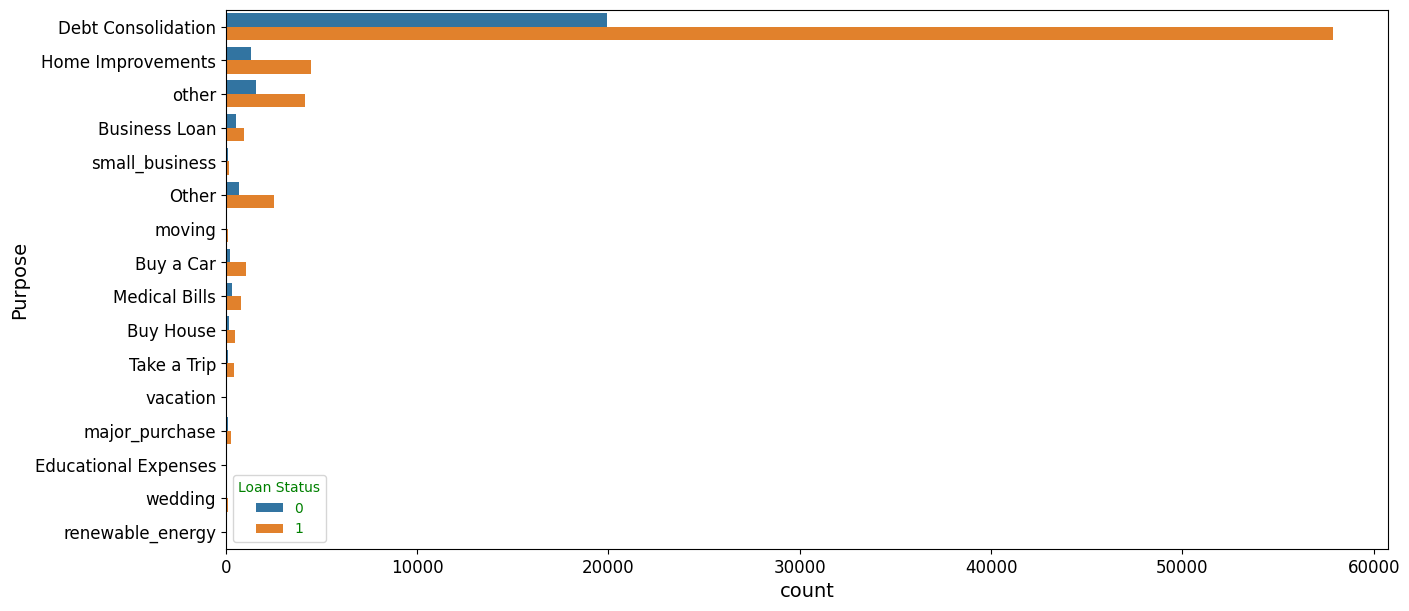

In [63]:
sns.countplot(y='Purpose', hue='Loan Status', data=data)

,Purpose,Loan Status
2,Buy a Car,0.820690
4,Educational Expenses,0.794118
7,Other,0.788790
5,Home Improvements,0.775369
15,wedding,0.769912
8,Take a Trip,0.763916
1,Buy House,0.750784
3,Debt Consolidation,0.743981
9,major_purchase,0.737401
11,other,0.723823


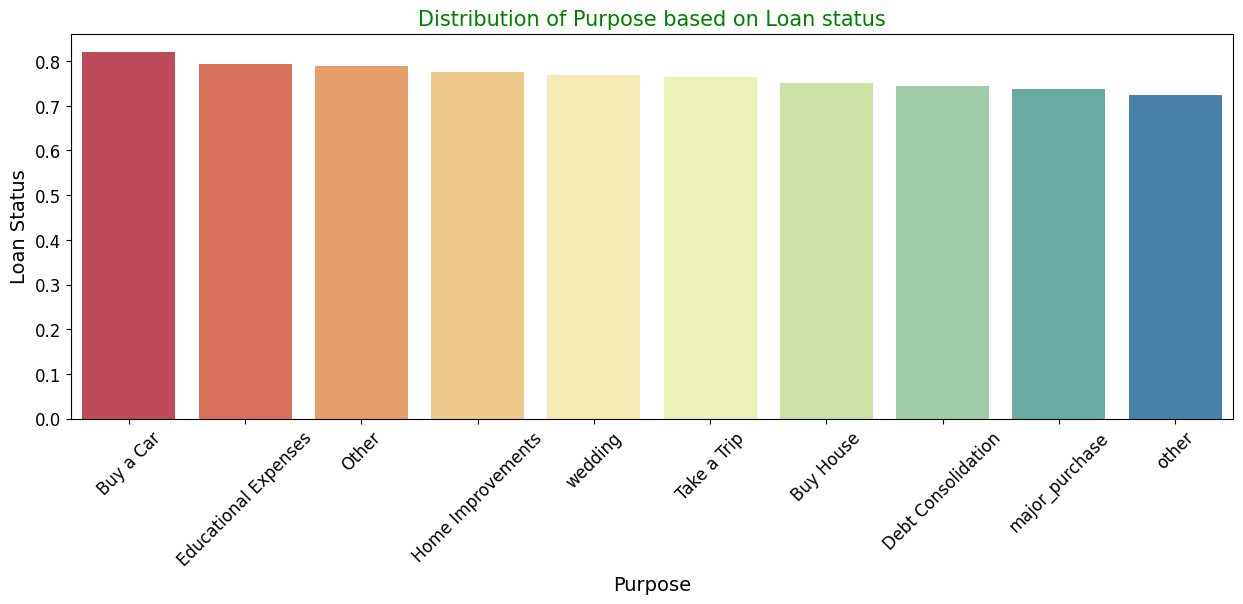

In [64]:
temp = (data.groupby('Purpose')['Loan Status'].mean()
            .reset_index().sort_values(by='Loan Status',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Purpose'],y=temp['Loan Status'], palette=("Spectral"))
plt.title("Distribution of Purpose based on Loan status",size=15)
plt.xticks(rotation=45)
plt.show()

In [65]:
data['purpose_term'] =  data.groupby('Purpose')['Loan Status'].transform('mean')

In [66]:
 # Saving the mapping dict for inference use
purpose_term_map = data.groupby('Purpose')['Loan Status'].mean().to_dict()

import pickle
fileName = 'model/purpose_term_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(purpose_term_map,f)

purpose_term_map

{'Business Loan': 0.6449033977348434,
 'Buy House': 0.7507836990595611,
 'Buy a Car': 0.8206896551724138,
 'Debt Consolidation': 0.743980975641108,
 'Educational Expenses': 0.7941176470588235,
 'Home Improvements': 0.7753686036426712,
 'Medical Bills': 0.7128347183748845,
 'Other': 0.7887903736542116,
 'Take a Trip': 0.763915547024952,
 'major_purchase': 0.7374005305039788,
 'moving': 0.6711409395973155,
 'other': 0.7238229093464511,
 'renewable_energy': 0.5555555555555556,
 'small_business': 0.5321428571428571,
 'vacation': 0.6808510638297872,
 'wedding': 0.7699115044247787}

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98582 entries, 0 to 111104
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       98582 non-null  object 
 1   Customer ID                   98582 non-null  object 
 2   Loan Status                   98582 non-null  int64  
 3   Current Loan Amount           98582 non-null  int64  
 4   Term                          98582 non-null  object 
 5   Credit Score                  98582 non-null  float64
 6   Years in current job          98582 non-null  float64
 7   Home Ownership                98582 non-null  object 
 8   Annual Income                 98582 non-null  float64
 9   Purpose                       98582 non-null  object 
 10  Monthly Debt                  98582 non-null  float32
 11  Years of Credit History       98582 non-null  float64
 12  Months since last delinquent  98582 non-null  float64
 13  Numbe

In [68]:
data = data[['Loan Status', 'Current Loan Amount', 'Credit Score', 'Years in current job', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',  'Loan_status_home_ownership', 'purpose_term']]  

Text(0.5, 1.0, 'Correlation Matrix')

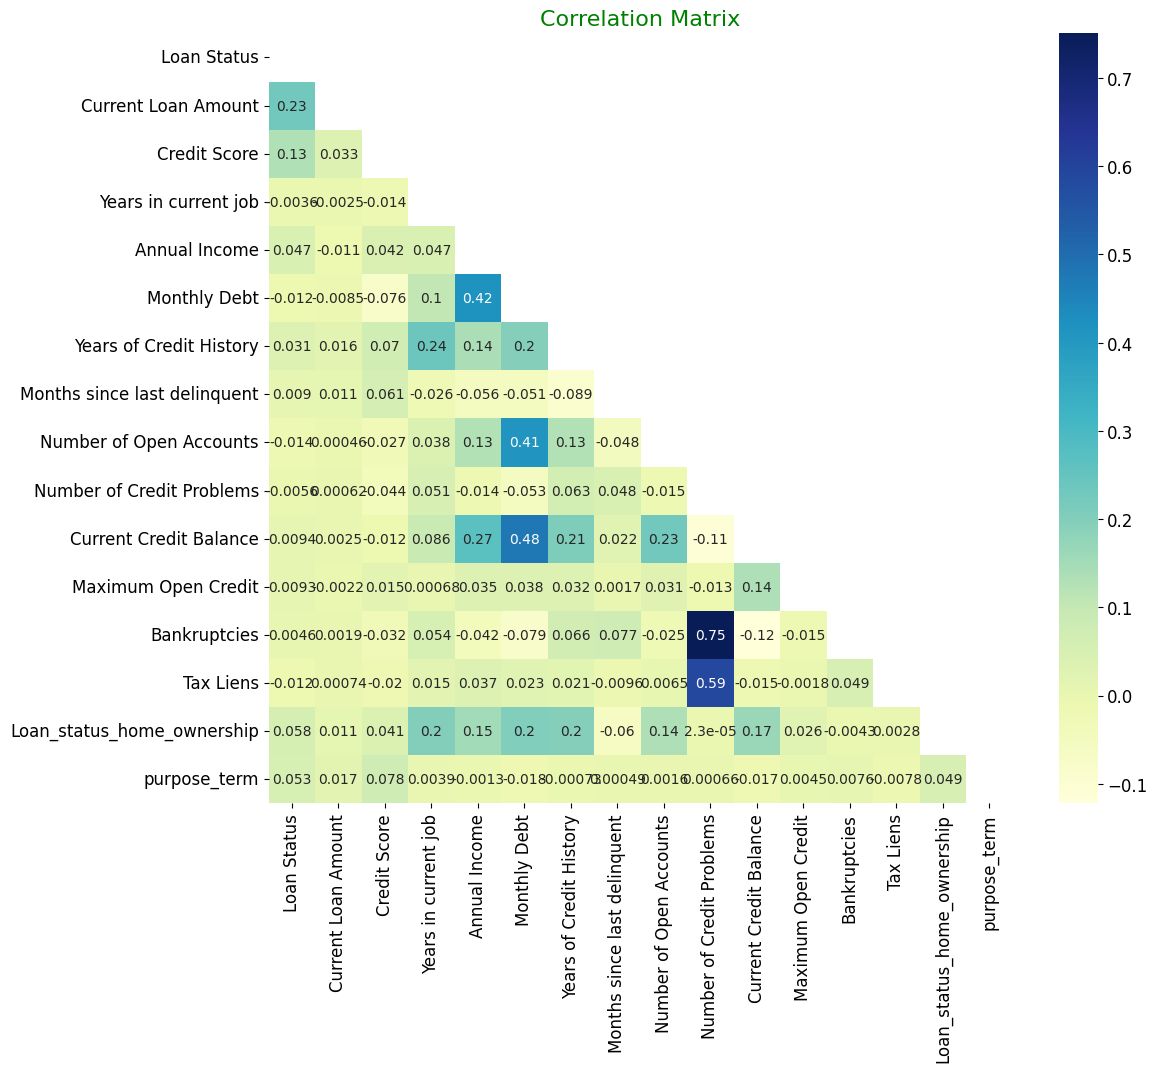

In [71]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True, mask=mask)
ax.set_title('Correlation Matrix', fontsize=16)